In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-06-25 08:46:03.045513: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-25 08:46:03.584269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-25 08:46:03.584327: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-25 08:46:03.586985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-25 08:46:03.827465: I tensorflow/core/platform/cpu_feature_g

In [3]:
df_cc = pd.read_csv('creditcard.csv')

In [4]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
df_cc.shape

(284807, 31)

In [5]:
df_cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df_cc.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df_cc.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
df_cc.duplicated().sum()

1081

In [9]:
df_cc[df_cc.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


No need to drop duplicates, they are not real duplicates overall.

In [10]:
df_cc['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [149]:
df_cc['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [161]:
df_cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [181]:
df_cc['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [183]:
df_cc[df_cc['Class'] == 1].describe()['Time']

count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

In [200]:
df_cc[df_cc['Class'] == 1]['Time'].value_counts()

Time
68207.0     6
93879.0     4
84204.0     4
93853.0     4
93860.0     4
           ..
45501.0     1
45463.0     1
44532.0     1
44393.0     1
170348.0    1
Name: count, Length: 468, dtype: int64

In [184]:
df_cc[df_cc['Class'] == 1].describe()['Amount']

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [185]:
df_cc[df_cc['Class'] == 0]['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
import seaborn as sns

/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


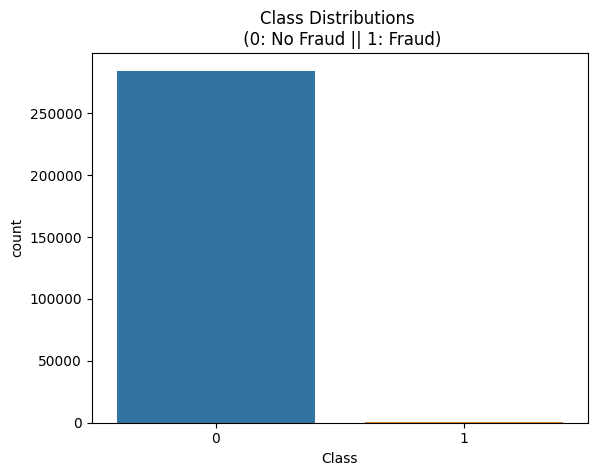

In [13]:
sns.countplot(x = 'Class', data = df_cc)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')
plt.show()

In [17]:
numeric_columns = (list(df_cc.loc[:, 'Time':'Amount']))

In [22]:
numeric_columns == df_cc.columns[:-1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [42]:
import warnings

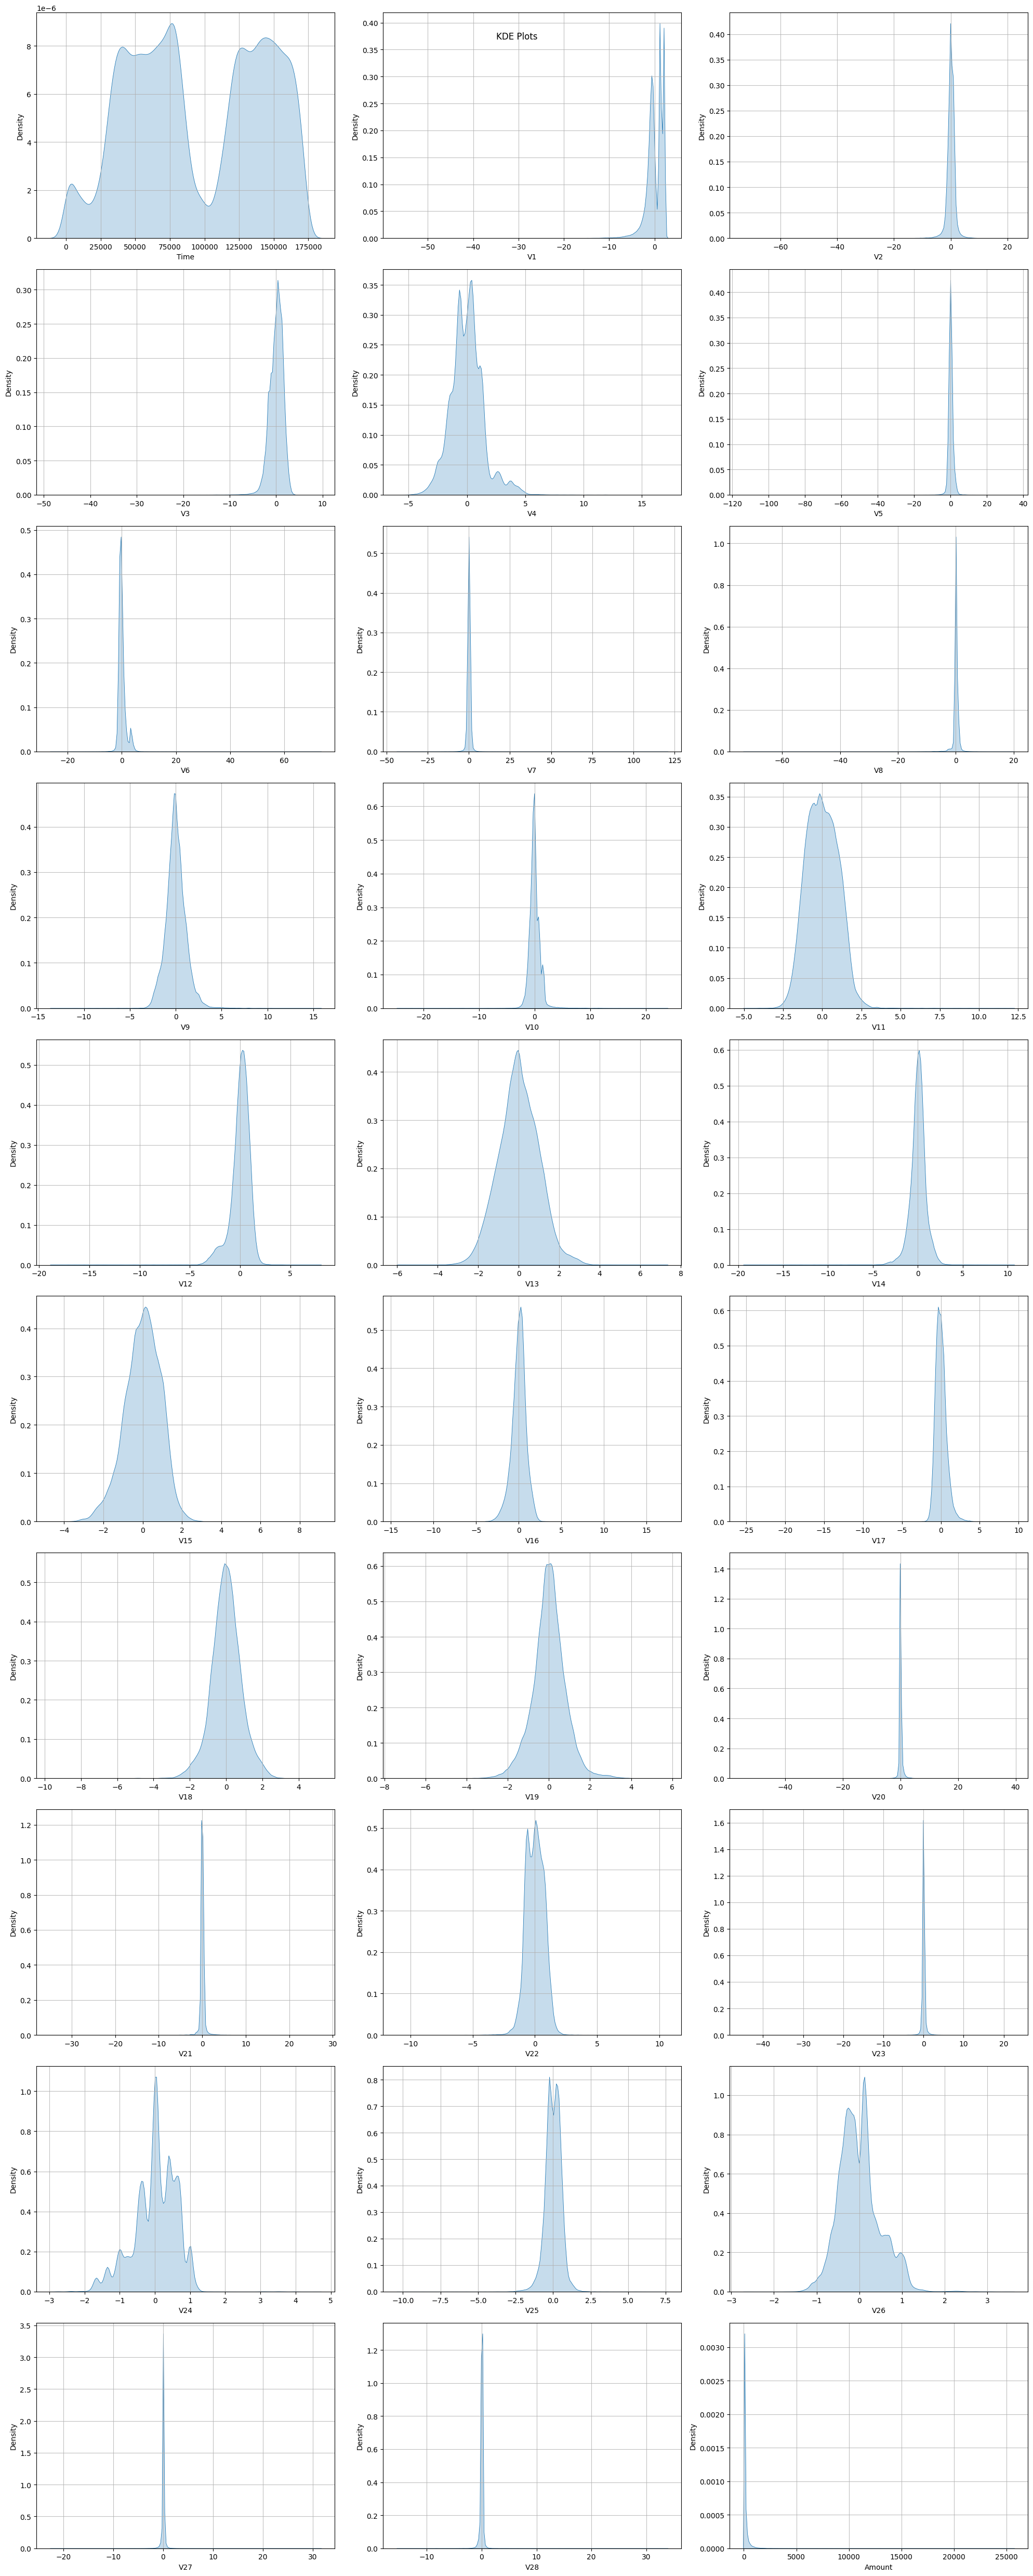

In [83]:
warnings.filterwarnings("ignore")

fig = plt.figure(figsize = (20,50))
fig.suptitle('KDE Plots')
for idx, column in enumerate(df_cc.columns[:-1]):
    ax = fig.add_subplot(10, 3, idx+1)
    ax.grid(alpha = 0.8)
    sns.kdeplot(x = column, fill = True, linewidth=0.6, data = df_cc)
    ax.set_xlabel(column)
    
fig.tight_layout()
fig.show()

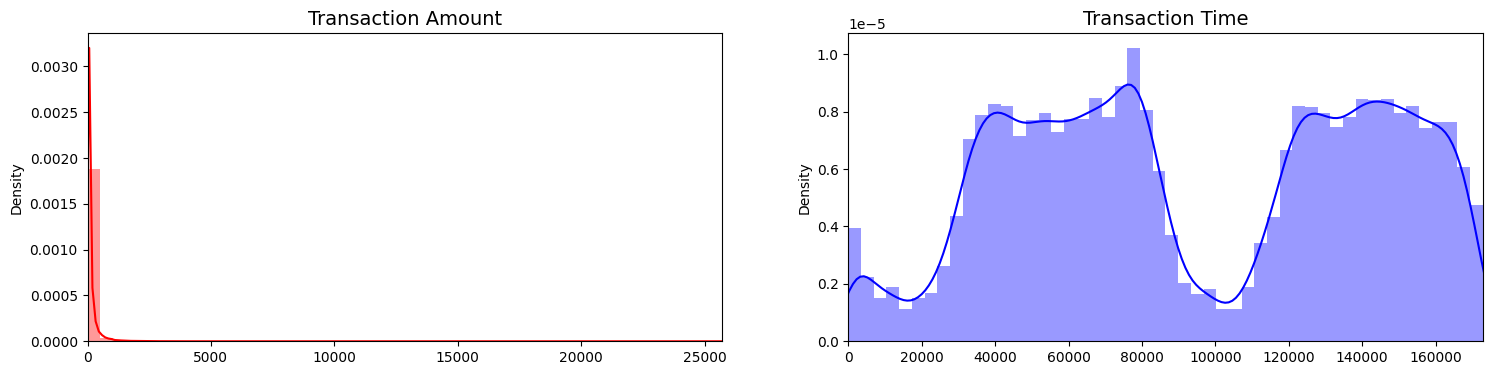

In [53]:
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_cc['Amount'].values
time_val = df_cc['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

Text(0.5, 1.0, 'Normal Transaction Amount')

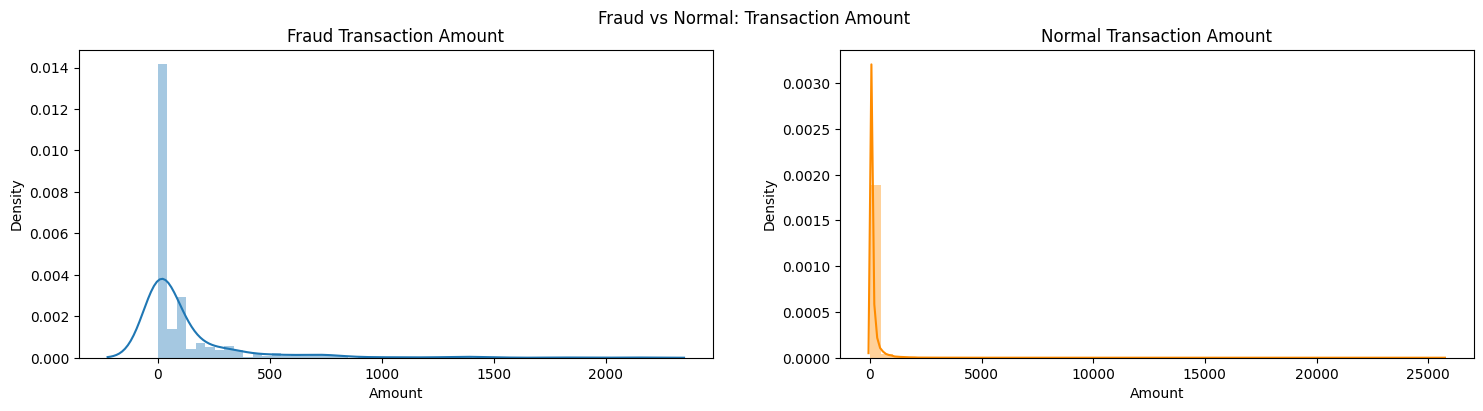

In [82]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))
fig.suptitle('Fraud vs Normal: Transaction Amount')

sns.distplot(df_cc[df_cc['Class'] == 1]['Amount'], ax = ax[0])
ax[0].set_title('Fraud Transaction Amount')
sns.distplot(df_cc[df_cc['Class'] == 0]['Amount'], ax = ax[1], color = '#FF8C00')
ax[1].set_title('Normal Transaction Amount')

Text(0.5, 1.0, 'Normal Transaction Time')

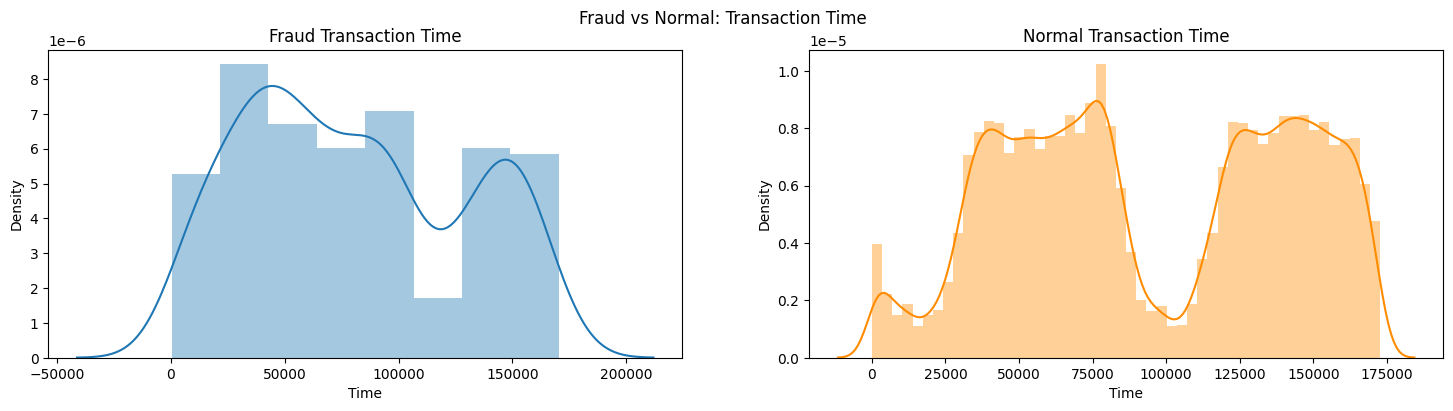

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (18,4))
fig.suptitle('Fraud vs Normal: Transaction Time')

sns.distplot(df_cc[df_cc['Class'] == 1]['Time'], ax = ax[0])
ax[0].set_title('Fraud Transaction Time')
sns.distplot(df_cc[df_cc['Class'] == 0]['Time'], ax = ax[1], color = '#FF8C00')
ax[1].set_title('Normal Transaction Time')

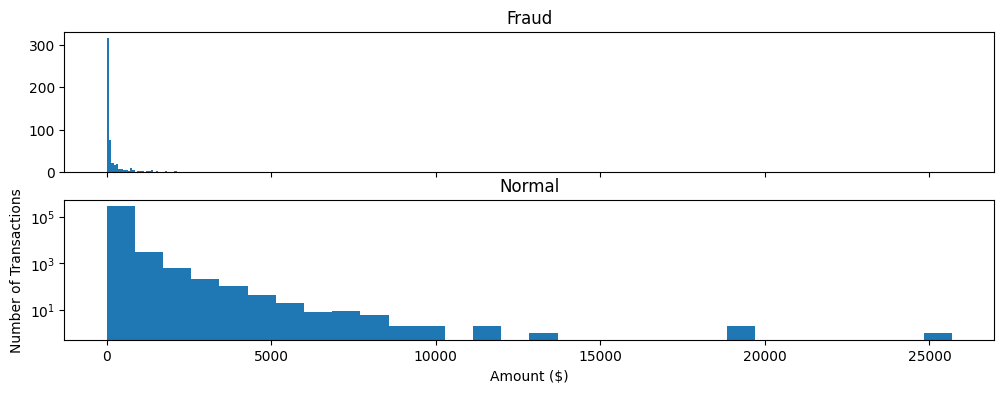

In [80]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df_cc.Amount[df_cc.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df_cc.Amount[df_cc.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

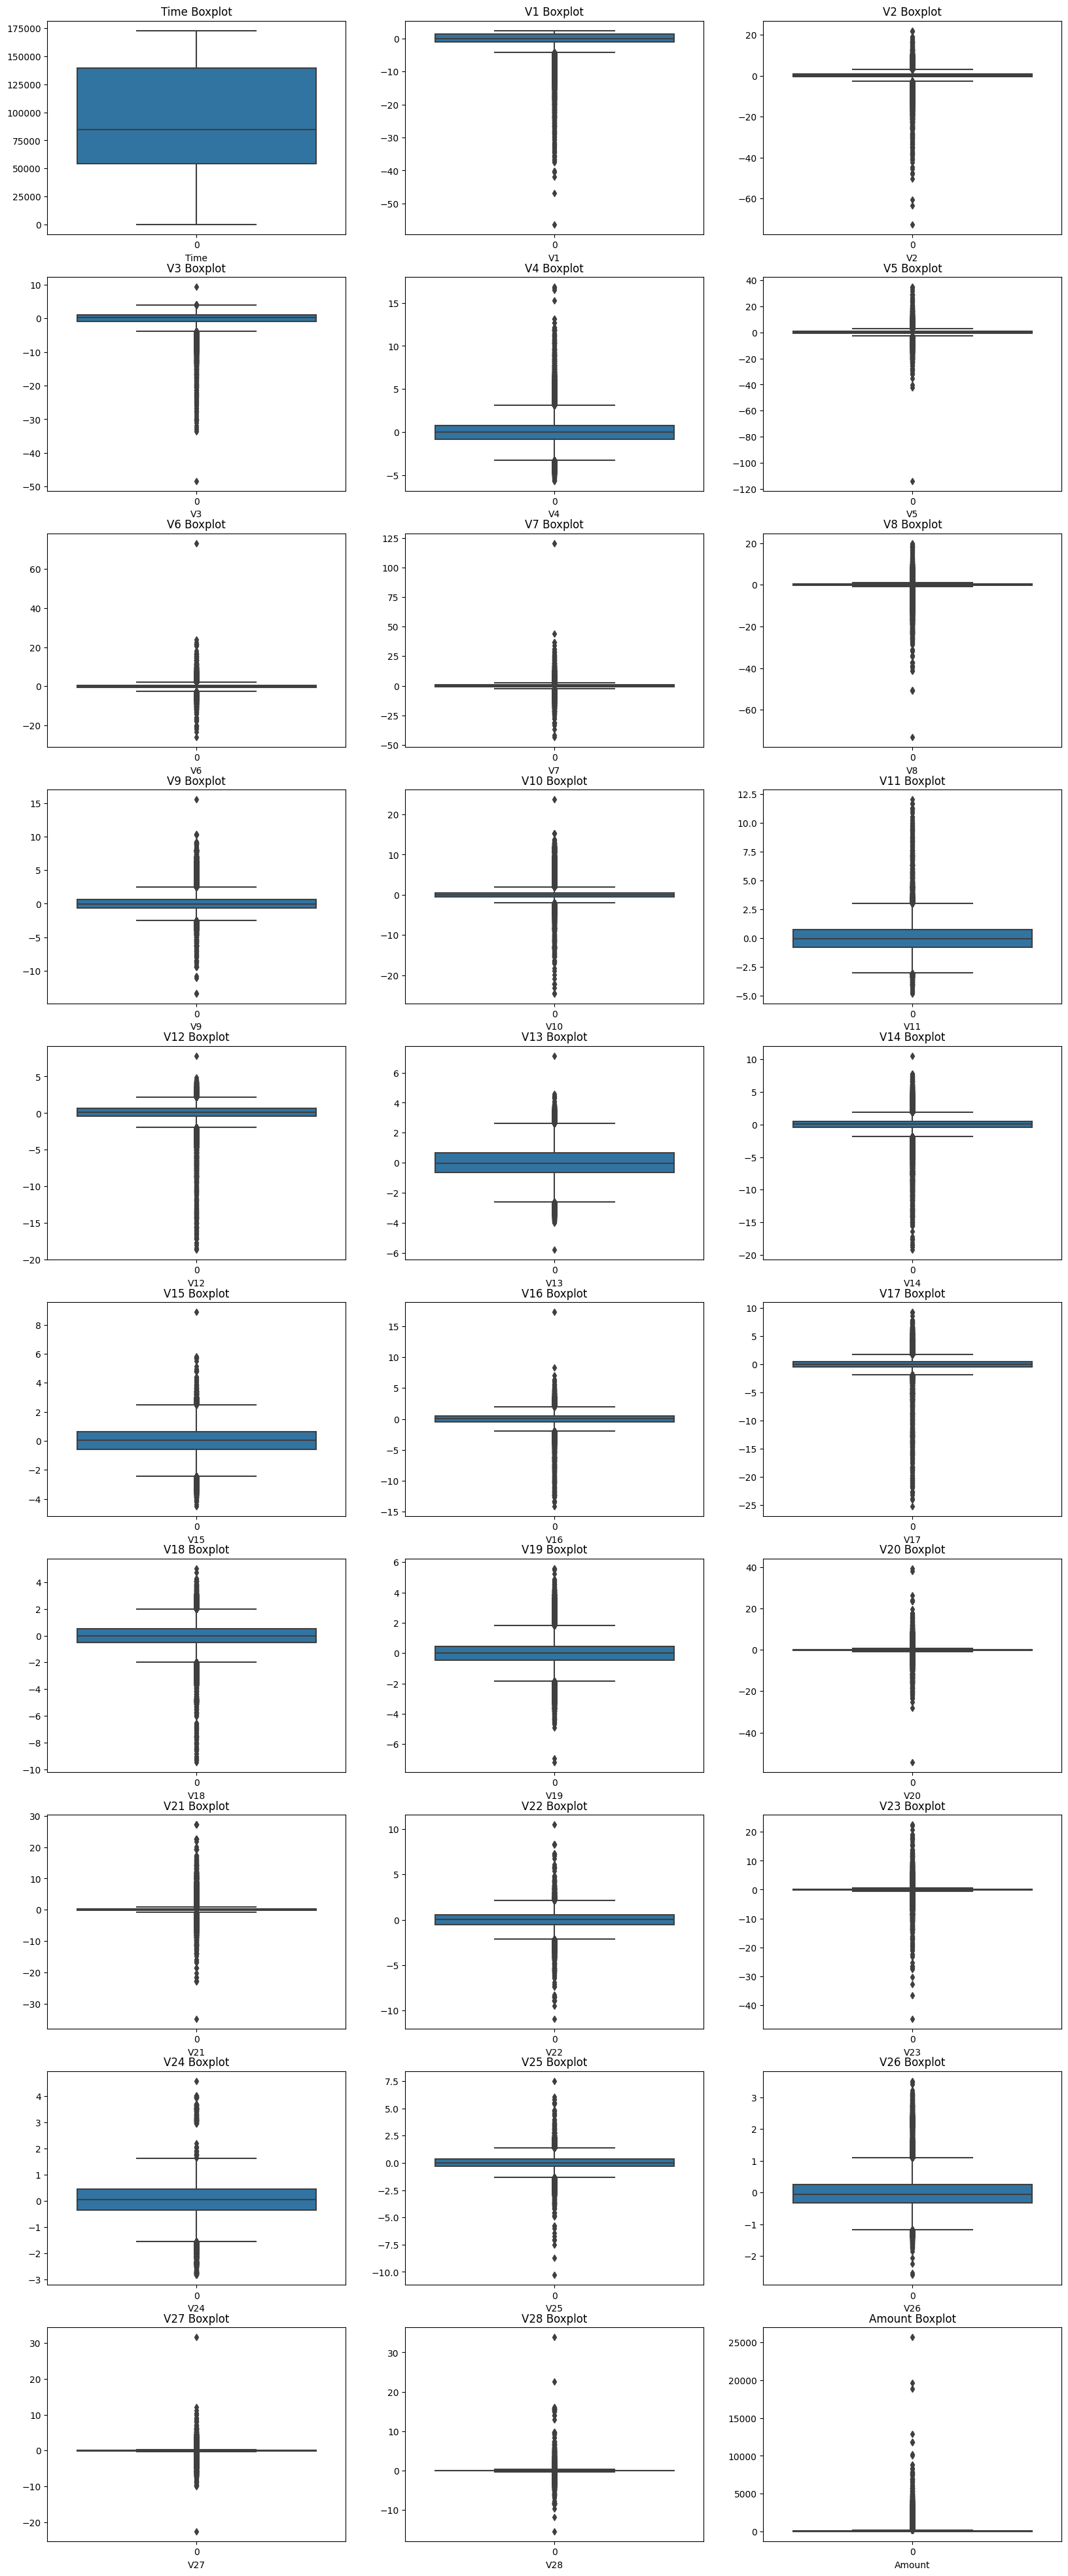

In [101]:
fig = plt.figure(figsize = (20, 50))
for idx, column in enumerate(df_cc.columns[:-1]):
    ax = fig.add_subplot(10, 3, idx+1)
    sns.boxplot(df_cc[column], ax = ax)
    ax.set_xlabel(column)
    ax.set_title(f'{column} Boxplot')

/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


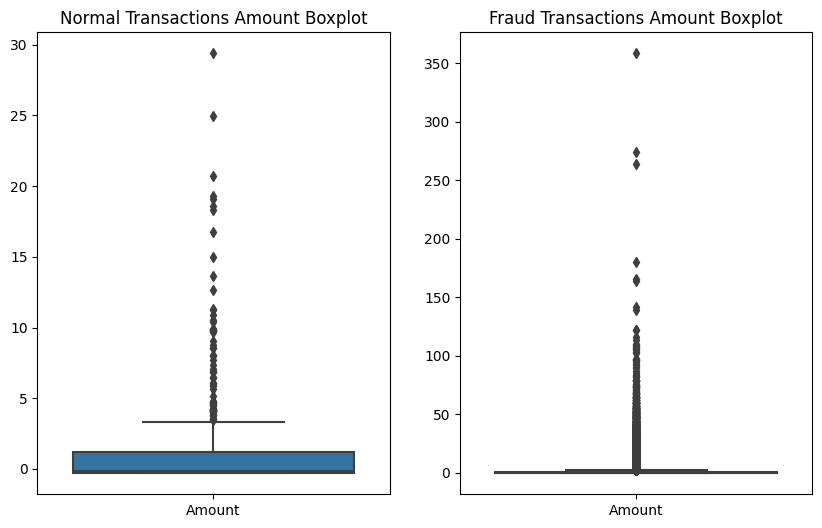

In [292]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))

sns.boxplot(df_cc[df_cc['Class'] == 1][['Amount']], ax = ax[0])
ax[0].set_title('Normal Transactions Amount Boxplot')

sns.boxplot(df_cc[df_cc['Class'] == 0][['Amount']], ax = ax[1])
ax[1].set_title('Fraud Transactions Amount Boxplot')
plt.show()

/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/anubh/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


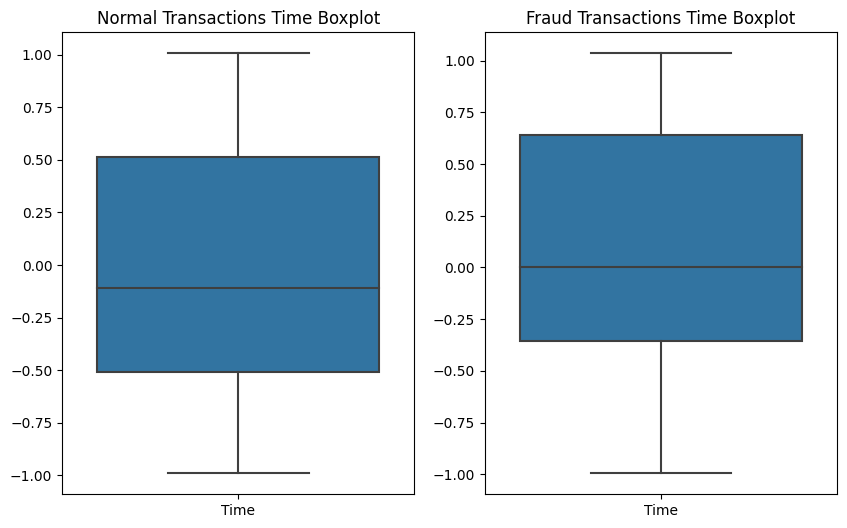

In [293]:
fig, ax = plt.subplots(1, 2, figsize = (10,6))

sns.boxplot(df_cc[df_cc['Class'] == 1][['Time']], ax = ax[0])
ax[0].set_title('Normal Transactions Time Boxplot')

sns.boxplot(df_cc[df_cc['Class'] == 0][['Time']], ax = ax[1])
ax[1].set_title('Fraud Transactions Time Boxplot')
plt.show()

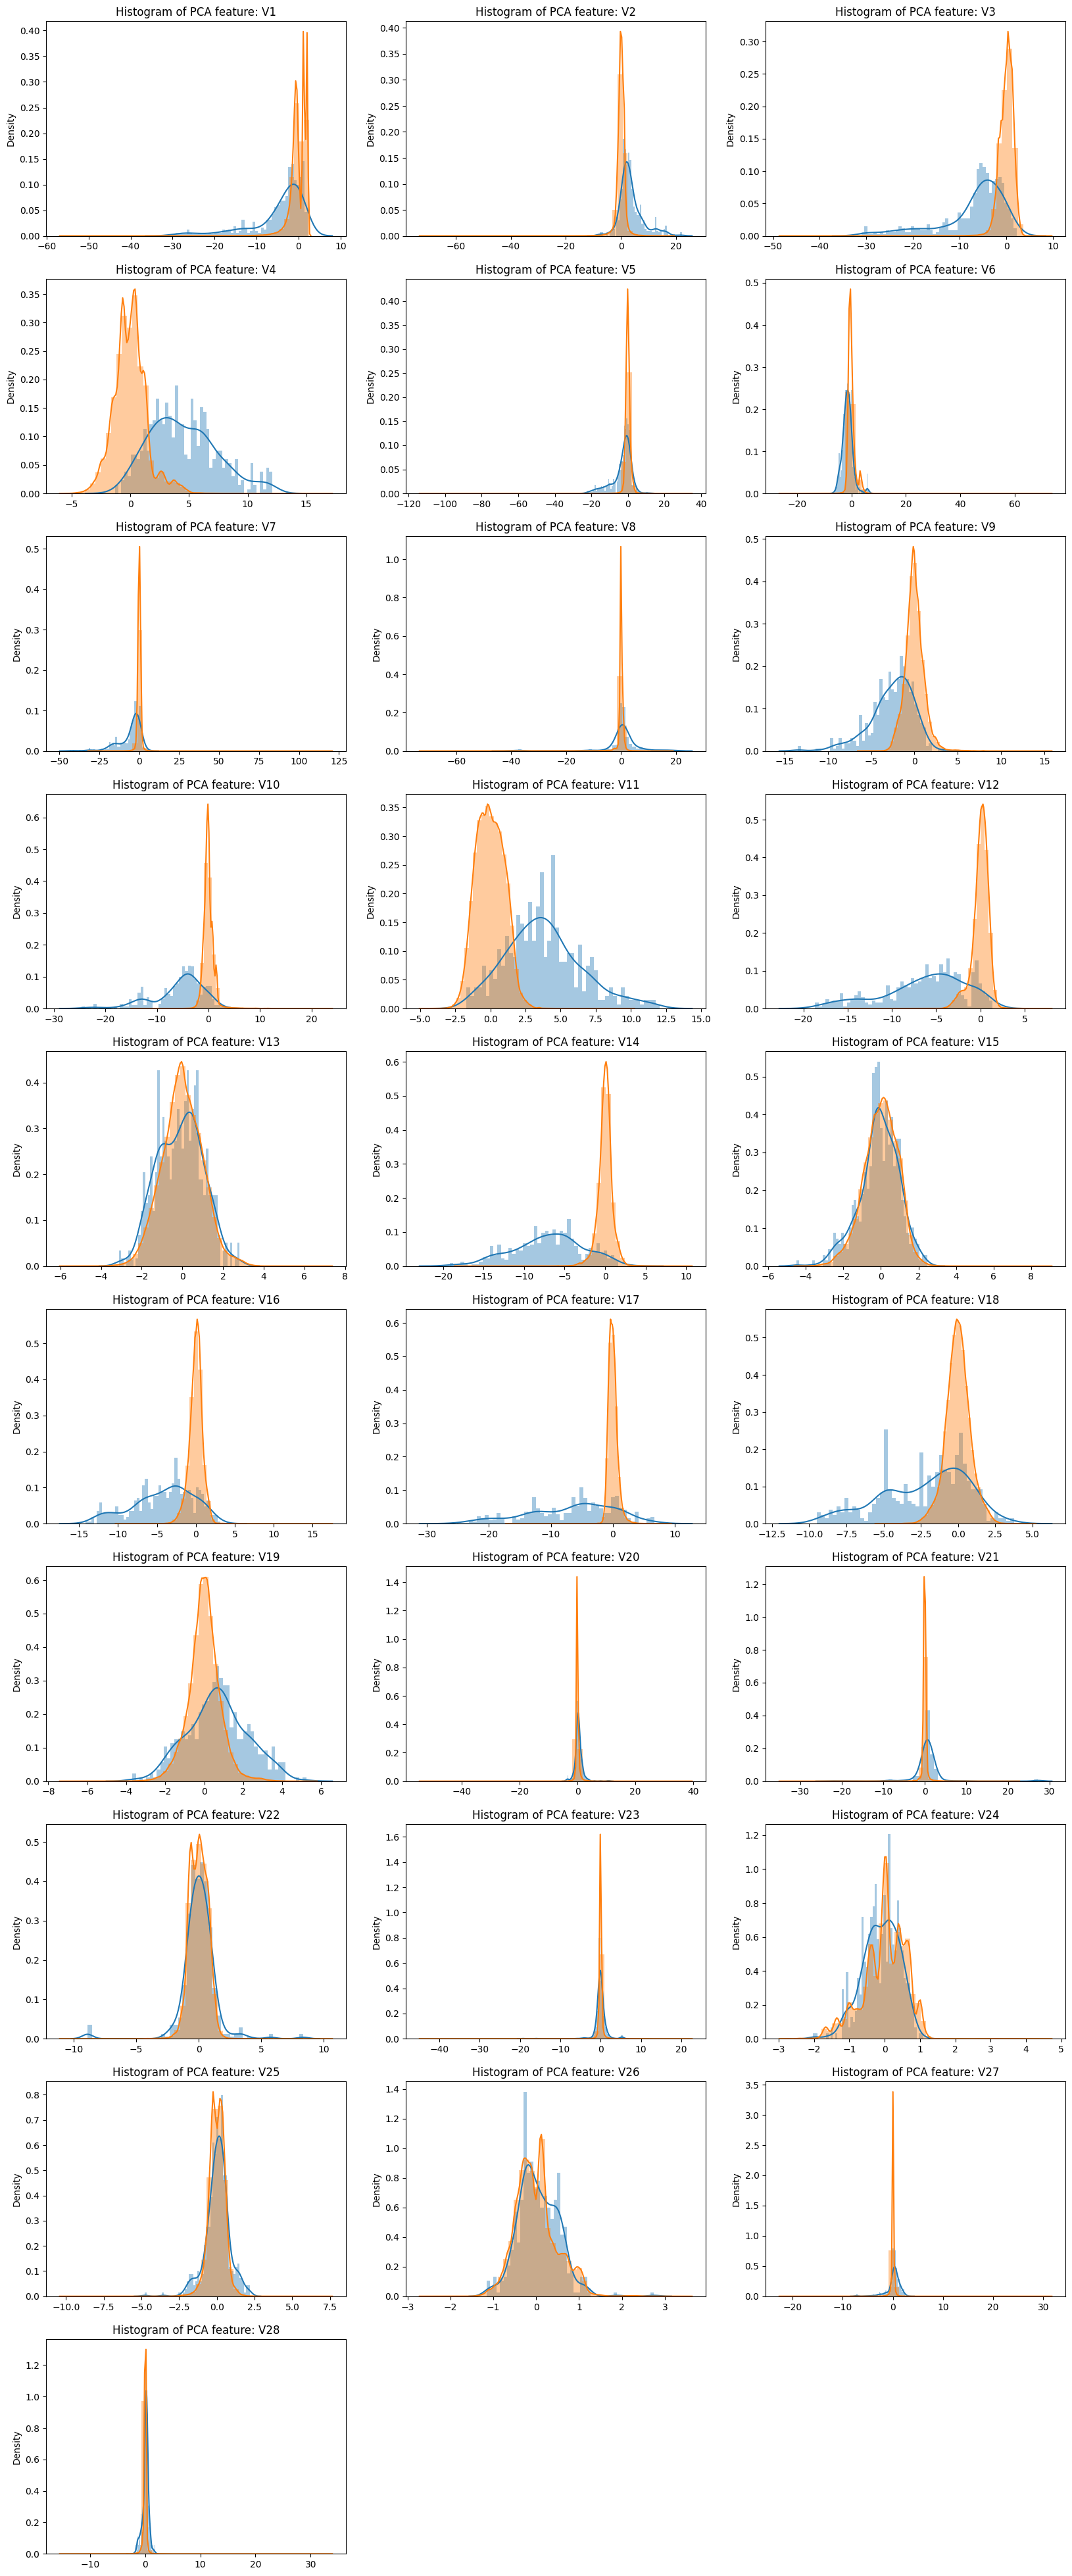

In [148]:
fig = plt.figure(figsize=(20, 50))

for idx, column in enumerate(df_cc.columns[1:29]):
    ax = fig.add_subplot(10, 3, idx+1)
    sns.distplot(df_cc[column][df_cc.Class == 1], bins=50)
    sns.distplot(df_cc[column][df_cc.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('Histogram of PCA feature: ' + str(column))
plt.show()

<Axes: >

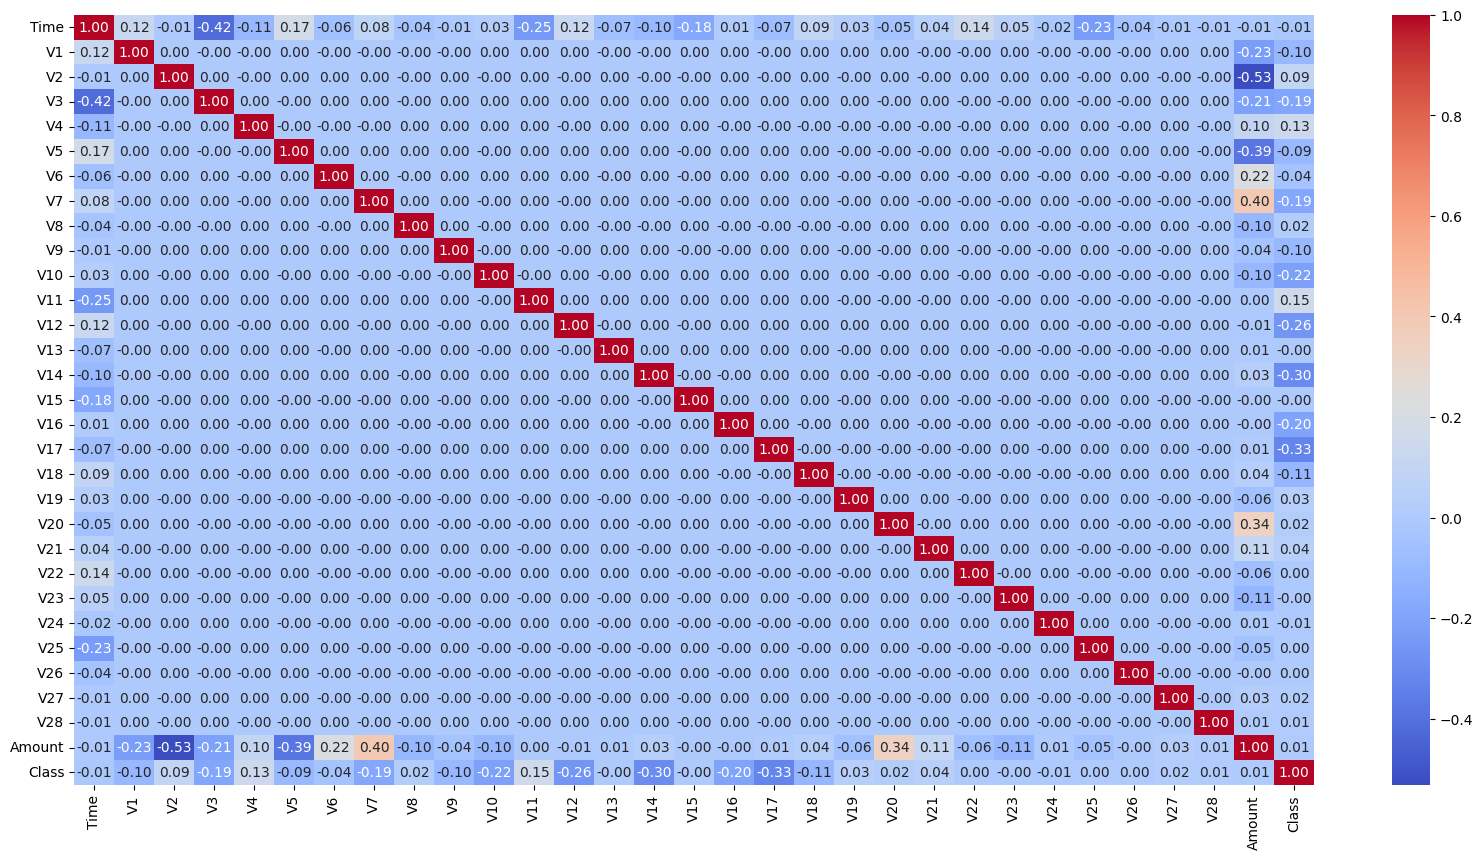

In [370]:
plt.figure(figsize = (20,10))
sns.heatmap(df_cc.corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import RobustScaler

In [202]:
# Creating Dataset

In [6]:
rob_scaler = RobustScaler()
df_cc['Amount'] = rob_scaler.fit_transform(df_cc['Amount'].values.reshape(-1,1))
df_cc['Time'] = rob_scaler.fit_transform(df_cc['Time'].values.reshape(-1,1))

In [7]:
df_cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.118914,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.927124,0.001727
std,0.557903,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,3.495006,0.041527
min,-0.994983,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-0.307413,0.000000
25%,-0.358210,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-0.229162,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,0.000000
75%,0.641790,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.770838,0.000000
max,1.035022,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,358.683155,1.000000


In [9]:
train_df, test_df = train_test_split(df_cc, test_size = 0.2, random_state = 10, stratify = df_cc['Class'])

In [10]:
df_cc['Class'].value_counts(normalize = True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [11]:
train_df['Class'].value_counts(normalize = True)

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64

In [223]:
test_df['Class'].value_counts(normalize = True)

Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64

In [245]:
train_df.shape

(227845, 31)

In [246]:
test_df.shape

(56962, 31)

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
from imblearn.over_sampling import BorderlineSMOTE

In [14]:
X_train = train_df.iloc[:,:-1]
y_train = train_df['Class']
X_test = test_df.iloc[:,:-1]
y_test = test_df['Class']

In [15]:
smote_border = BorderlineSMOTE(random_state = 42, kind = 'borderline-2')
X_train_smoteb, y_train_smoteb = smote_border.fit_resample(X_train, y_train)

In [16]:
y_train_smoteb.value_counts(normalize = True)

Class
0    0.500001
1    0.499999
Name: proportion, dtype: float64

In [13]:
y_train_smoteb[-5:]

454896    1
454897    1
454898    1
454899    1
454900    1
Name: Class, dtype: int64

In [17]:
import random
from random import shuffle
index = [i for i in range(len(X_train_smoteb))]
random.seed(42)
shuffle(index)
X_train_smoteb = X_train_smoteb.iloc[index, :]
y_train_smoteb = y_train_smoteb[index]

In [14]:
X_train_smoteb.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
454896,-0.373531,-8.279399,6.367811,-10.659362,3.734813,-6.390429,-2.992781,-6.891197,5.762212,-2.150372,...,0.695808,0.812035,-0.640361,-0.166363,0.042264,0.438077,-0.275423,0.941135,0.186602,0.922604
454897,0.657099,-0.705912,-0.032600,-2.566386,2.964227,-1.877700,0.122270,1.172127,-0.207459,-2.565191,...,1.274467,1.060455,0.315096,1.330208,-0.131730,0.075270,0.185889,-0.043555,-0.003084,7.665884
454898,-0.384272,-7.643927,7.304146,-4.640604,1.531241,-2.579579,2.882075,-9.934143,-19.728787,-0.578901,...,-2.004607,14.554455,-4.945789,2.862228,-0.255698,0.005318,-0.089541,0.579196,0.514156,-0.287078
454899,-0.142772,-3.454364,1.770764,-2.938411,1.307196,-2.785539,-1.288536,-3.509205,1.679920,-2.672119,...,0.135221,0.551736,-0.263061,-0.155040,-0.180210,0.142779,-0.320622,0.187922,0.392304,0.911591
454900,0.125528,-3.359689,5.213825,-3.554678,6.433658,-2.115983,2.306429,-8.390672,-11.619759,-2.741589,...,3.634507,-5.465388,2.386530,0.922946,-0.503900,-0.590430,0.393622,0.021612,0.158907,0.149660


In [18]:
y_train_smoteb[-5:]

144194    0
388786    1
13112     0
58369     0
335243    1
Name: Class, dtype: int64

In [312]:
print(f'Shape of Training Dataset - Unbalanced: {X_train.shape}')
print(f'Shape of Training Dataset - Borderline SMOTE: {X_train_smoteb.shape}') 
print(f'Shape of Test Dataset: {X_test.shape}')

Shape of Training Dataset - Unbalanced: (227845, 30)
Shape of Training Dataset - Borderline SMOTE: (454901, 30)
Shape of Test Dataset: (56962, 30)


## Anomaly Detection Techniques

In [298]:
def IQR_method(df, n, features):
    """
    Identify outliers in a DataFrame using the Tukey IQR method.

    Parameters:
    df (DataFrame): The input DataFrame.
    n (int): The minimum number of outliers in an observation to be considered.
    features (list): List of feature column names to analyze for outliers.

    Returns:
    list: A list of indices corresponding to observations with more than 'n' outliers.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # Append the list of outliers
        outlier_list.extend(outlier_list_column)

    # Count occurrences of each outlier index
    outlier_count = Counter(outlier_list)

    # Select observations containing more than 'n' outliers
    multiple_outliers = [k for k, v in outlier_count.items() if v > n]

    # Calculate the total numbber of outliers
    total_outliers = len(multiple_outliers)
    
    print('Total number of outliers is:', total_outliers)

    return multiple_outliers


In [306]:
iqr_outliers = IQR_method(X_test, 14, X_test.columns) 

Total number of outliers is: 146


In [313]:
y_test[iqr_outliers].sum()

41

In [317]:
fbeta_score(y_pred = pred_dnn_sm_bin>0.5, y_true = y_test.values, beta = 2.0)

Object `fbeta` not found.


In [319]:
print(f'Recall for IQR Method: {y_test[iqr_outliers].sum()/y_test.sum()}')
print(f'F-Beta for IQR Method: {(y_test[iqr_outliers].sum()/len(iqr_outliers))*(y_test[iqr_outliers].sum()/y_test.sum())*5/(4*(y_test[iqr_outliers].sum()/len(iqr_outliers)) + (y_test[iqr_outliers].sum()/y_test.sum()))}')

Recall for IQR Method: 0.41836734693877553
F-Beta for IQR Method: 0.38104089219330856


In [327]:
result_dict = {}

In [330]:
result_dict['IQR Method'] = [0.418, 0.381]

In [331]:
result_dict

{'IQR Method': [0.418, 0.381]}

In [309]:
y_test.sum()

98

In [316]:
y_train_smoteb.value_counts()

Class
0    227451
1    227450
Name: count, dtype: int64

In [300]:
from collections import Counter

In [ ]:
# Modified Z Score

In [320]:
from scipy.stats import median_abs_deviation

def z_scoremod_method(df, n, features):
    """
    Identify outliers in a DataFrame using the modified z-score method.

    Parameters:
    df (DataFrame): The input DataFrame.
    n (int): The minimum number of outliers in an observation to be considered.
    features (list): List of feature column names to analyze for outliers.

    Returns:
    list: A list of indices corresponding to observations with more than 'n' outliers.
    """
    outlier_list = []
    threshold = 3

    for column in features:
        # Calculate the mean and modified Z-score for each data point
        data_median = df[column].median()
        data_mad = median_abs_deviation(df[column])
        
        mod_z_score = abs(0.6745 * (df[column] - data_median) / data_mad)

        # Determine a list of indices of outliers for the feature column
        outlier_list_column = df[mod_z_score > threshold].index

        # Append the found outlier indices for the column to the list of outlier indices
        outlier_list.extend(outlier_list_column)

    # Select observations containing more than 'n' outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_list.items() if v > n]

    # Calculate the total number of outlier records
    df1 = df[df.index.isin(multiple_outliers)]
    total_outliers = df1.shape[0]
    print('Total number of outliers is:', total_outliers)

    return multiple_outliers

In [322]:
zmod_outliers = z_scoremod_method(X_test, 14, X_test.columns)

Total number of outliers is: 112


In [323]:
print(f'Recall for Modified Z Score: {y_test[zmod_outliers].sum()/y_test.sum()}')
print(f'F-Beta for Modified Z Score: {(y_test[zmod_outliers].sum()/len(zmod_outliers))*(y_test[zmod_outliers].sum()/y_test.sum())*5/(4*(y_test[zmod_outliers].sum()/len(zmod_outliers)) + (y_test[zmod_outliers].sum()/y_test.sum()))}')

Recall for Modified Z Score: 0.3877551020408163
F-Beta for Modified Z Score: 0.376984126984127


In [332]:
result_dict['Modified Z Score'] = [0.388, 0.377]

In [325]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan = DBSCAN(eps= 3, min_samples= 10).fit(X_train)

# Extract the cluster labels assigned to each data point
labels = dbscan.labels_

In [19]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print('The number of clusters in the dataset is:', n_clusters_)

The number of clusters in the dataset is: 31


In [ ]:
result_dict['DBSCAN'] = [0, 0]

In [20]:
label_counts = pd.Series(labels).value_counts()

# Print the counts of each cluster label
print(label_counts)

 0     183373
-1      16821
 2      13063
 1      11386
 4       1257
 3        866
 7        256
 11       184
 10       142
 5         91
 15        68
 6         59
 13        27
 12        24
 9         22
 16        21
 8         18
 17        18
 27        17
 26        14
 19        12
 20        12
 14        12
 25        12
 23        11
 29        11
 24        11
 22         9
 21         9
 18         7
 28         6
 30         6
Name: count, dtype: int64


In [335]:
result_dict['DBSCAN'] = [0.888, 0.062]

In [336]:
result_dict

{'IQR Method': [0.418, 0.381],
 'Modified Z Score': [0.388, 0.377],
 'DBSCAN': [0.888, 0.062]}

In [ ]:
dbscan = DBSCAN(eps= 3, min_samples= 10).fit(X_train_smoteb)

# Extract the cluster labels assigned to each data point
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Print the number of clusters
print('The number of clusters in the dataset is:', n_clusters_)

In [1]:
#DNN and Auto-Encoder

In [24]:
X_train.iloc[0,:].shape

(30,)

In [30]:
model_dnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = (None,30)),
    tf.keras.layers.Dense(units = 32, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 16, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
])
model_dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, None, 64)          1984      
                                                                 
 dense_13 (Dense)            (None, None, 32)          2080      
                                                                 
 dense_14 (Dense)            (None, None, 16)          528       
                                                                 
 dense_15 (Dense)            (None, None, 1)           17        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model_dnn.compile(optimizer = 'adam', loss= tf.keras.losses.BinaryFocalCrossentropy(gamma=2, from_logits=True),
                 metrics = ['accuracy', tf.keras.metrics.Recall()])
model_dnn.fit(X_train.values, y_train.values, epochs = 10)

Epoch 1/10
7121/7121 [==============================] - 62s 9ms/step - loss: 0.0010 - accuracy: 0.9992 - recall_2: 0.5761
Epoch 2/10
7121/7121 [==============================] - 62s 9ms/step - loss: 8.8830e-04 - accuracy: 0.9993 - recall_2: 0.6168
Epoch 3/10
7121/7121 [==============================] - 64s 9ms/step - loss: 8.1604e-04 - accuracy: 0.9993 - recall_2: 0.6472
Epoch 4/10
7121/7121 [==============================] - 62s 9ms/step - loss: 7.6045e-04 - accuracy: 0.9994 - recall_2: 0.6751
Epoch 5/10
7121/7121 [==============================] - 61s 9ms/step - loss: 7.4289e-04 - accuracy: 0.9994 - recall_2: 0.6904
Epoch 6/10
7121/7121 [==============================] - 63s 9ms/step - loss: 7.0656e-04 - accuracy: 0.9994 - recall_2: 0.7005
Epoch 7/10
7121/7121 [==============================] - 63s 9ms/step - loss: 6.6640e-04 - accuracy: 0.9994 - recall_2: 0.7005
Epoch 8/10
7121/7121 [==============================] - 63s 9ms/step - loss: 6.5869e-04 - accuracy: 0.9994 - recall_2: 0.6

In [42]:
model_dnn.compile(optimizer = 'adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = ['accuracy', tf.keras.metrics.Recall()])
hist_dnn_ub = model_dnn.fit(X_train.values, y_train.values, epochs = 10)

Epoch 1/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0018 - accuracy: 0.9996 - recall_4: 0.7817
Epoch 2/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0017 - accuracy: 0.9996 - recall_4: 0.7817
Epoch 3/10
7121/7121 [==============================] - 58s 8ms/step - loss: 0.0016 - accuracy: 0.9996 - recall_4: 0.7817
Epoch 4/10
7121/7121 [==============================] - 59s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - recall_4: 0.8223
Epoch 5/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - recall_4: 0.7995
Epoch 6/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - recall_4: 0.8376
Epoch 7/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0013 - accuracy: 0.9996 - recall_4: 0.8299
Epoch 8/10
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - recall_4: 0.8198
Epoch 9/10
7121/7121 [==

In [43]:
?model_dnn.fit

Signature:
model_dnn.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It could be:
      - A Numpy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
      - A TensorFlow tensor, or a list of tensors
        (in case the model has multiple inputs).
      - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
      - A `tf.data` dataset. Should return a tuple
        of either `(inputs, targets)` or
        `(inputs, targets, samp

In [55]:
import joblib

In [59]:
joblib.dump(model_dnn, 'model_dnn.pkl')

['model_dnn.pkl']

In [93]:
model_dnn = joblib.load("model_dnn.pkl")

In [94]:
hist_dnn_ub_2 = model_dnn.fit(X_train.values, y_train.values, epochs = 16, initial_epoch = 15)

Epoch 16/16
7121/7121 [==============================] - 55s 8ms/step - loss: 0.0010 - accuracy: 0.9997 - recall_4: 0.8706


In [ ]:
model_dnn.evaluate(X_test, y_test)

In [72]:
model_dnn_smote = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = (None,30)),
    tf.keras.layers.Dense(units = 32, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 16, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
])

In [73]:
model_dnn_smote.compile(optimizer = 'adam', loss= tf.keras.losses.BinaryFocalCrossentropy(gamma=2, from_logits=True),
                 metrics = ['accuracy', tf.keras.metrics.Recall()])
hist_dnn_smote = model_dnn_smote.fit(X_train_smoteb.values, y_train_smoteb.values, epochs = 10)

Epoch 1/10
14216/14216 [==============================] - 114s 8ms/step - loss: 0.0031 - accuracy: 0.9966 - recall_6: 0.9946
Epoch 2/10
14216/14216 [==============================] - 111s 8ms/step - loss: 0.0013 - accuracy: 0.9992 - recall_6: 0.9991
Epoch 3/10
14216/14216 [==============================] - 117s 8ms/step - loss: 0.0010 - accuracy: 0.9994 - recall_6: 0.9992
Epoch 4/10
14216/14216 [==============================] - 115s 8ms/step - loss: 8.9784e-04 - accuracy: 0.9995 - recall_6: 0.9994
Epoch 5/10
14216/14216 [==============================] - 112s 8ms/step - loss: 7.3752e-04 - accuracy: 0.9996 - recall_6: 0.9995
Epoch 6/10
14216/14216 [==============================] - 107s 8ms/step - loss: 6.7387e-04 - accuracy: 0.9996 - recall_6: 0.9995
Epoch 7/10
14216/14216 [==============================] - 109s 8ms/step - loss: 6.1245e-04 - accuracy: 0.9996 - recall_6: 0.9995
Epoch 8/10
14216/14216 [==============================] - 109s 8ms/step - loss: 5.8848e-04 - accuracy: 0.9996

In [282]:
model_dnn_smote_bin = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = (None,30)),
    tf.keras.layers.Dense(units = 32, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 16, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
])

In [283]:
model_dnn_smote_bin.compile(optimizer = 'adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = ['accuracy', tf.keras.metrics.Recall()])
model_dnn_smote_bin.fit(X_train_smoteb.values, y_train_smoteb.values, epochs = 10)

Epoch 1/10
14216/14216 [==============================] - 113s 8ms/step - loss: 0.0091 - accuracy: 0.9981 - recall_33: 0.9980
Epoch 2/10
14216/14216 [==============================] - 115s 8ms/step - loss: 0.0034 - accuracy: 0.9994 - recall_33: 0.9995
Epoch 3/10
14216/14216 [==============================] - 109s 8ms/step - loss: 0.0026 - accuracy: 0.9995 - recall_33: 0.9995
Epoch 4/10
14216/14216 [==============================] - 106s 7ms/step - loss: 0.0023 - accuracy: 0.9996 - recall_33: 0.9996
Epoch 5/10
14216/14216 [==============================] - 107s 8ms/step - loss: 0.0020 - accuracy: 0.9996 - recall_33: 0.9997
Epoch 6/10
14216/14216 [==============================] - 109s 8ms/step - loss: 0.0018 - accuracy: 0.9997 - recall_33: 0.9997
Epoch 7/10
14216/14216 [==============================] - 106s 7ms/step - loss: 0.0016 - accuracy: 0.9997 - recall_33: 0.9997
Epoch 8/10
14216/14216 [==============================] - 107s 8ms/step - loss: 0.0017 - accuracy: 0.9997 - recall_33:

In [297]:
joblib.dump(model_dnn_smote_bin, 'model_dnn_smote_bin.pkl')

['model_dnn_smote_bin.pkl']

In [ ]:
model_dnn_bin

In [291]:
r_dnn_sm_bin = tf.keras.metrics.Recall()
r_dnn_sm_bin.update_state(y_true = y_test, y_pred = pred_dnn_sm_bin)
print(f'Recall for Dense Neural Network Smote - Cross Entropy: {r_dnn_sm_bin.result().numpy()}')

fb_dnn_sm_bin = fbeta_score(y_pred = pred_dnn_sm_bin>0.5, y_true = y_test.values, beta = 2.0)
print(f'F1-Beta Score for Dense Neural Network Smote - Binary Cross Entropy: {fb_dnn_sm_bin}')

Recall for Dense Neural Network Smote - Cross Entropy: 0.795918345451355
F1-Beta Score for Dense Neural Network Smote - Binary Cross Entropy: 0.787878787878788


In [337]:
result_dict['DNN SMOTE Binary Cross Entropy'] = [0.796, 0.788]

In [288]:
pred_dnn_sm_bin = tf.nn.sigmoid(model_dnn_smote_bin.predict(X_test))

1781/1781 [==============================] - 3s 2ms/step


In [277]:
model_dnn_bin = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = (None,30)),
    tf.keras.layers.Dense(units = 32, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 16, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
])

In [278]:
model_dnn_bin.compile(optimizer = 'adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 metrics = ['accuracy', tf.keras.metrics.Recall()])
model_dnn_bin.fit(X_train.values, y_train.values, epochs = 10)

Epoch 1/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0062 - accuracy: 0.9992 - recall_30: 0.6675
Epoch 2/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0031 - accuracy: 0.9994 - recall_30: 0.7538
Epoch 3/10
7121/7121 [==============================] - 57s 8ms/step - loss: 0.0029 - accuracy: 0.9994 - recall_30: 0.7614
Epoch 4/10
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0027 - accuracy: 0.9995 - recall_30: 0.7843
Epoch 5/10
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0026 - accuracy: 0.9994 - recall_30: 0.7538
Epoch 6/10
7121/7121 [==============================] - 55s 8ms/step - loss: 0.0025 - accuracy: 0.9995 - recall_30: 0.7538
Epoch 7/10
7121/7121 [==============================] - 55s 8ms/step - loss: 0.0023 - accuracy: 0.9995 - recall_30: 0.7462
Epoch 8/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0021 - accuracy: 0.9995 - recall_30: 0.7716
Epoch 9/10
7121/

In [296]:
joblib.dump(model_dnn_bin, 'model_dnn_bin.pkl')

['model_dnn_bin.pkl']

In [279]:
model_dnn_bin.evaluate(X_test, y_test)

1781/1781 [==============================] - 9s 5ms/step - loss: 0.0034 - accuracy: 0.9994 - recall_30: 0.7755


[0.0033527894411236048, 0.9994206428527832, 0.7755101919174194]

In [284]:
pred_dnn_n_bin = tf.nn.sigmoid(model_dnn_bin.predict(X_test))

1781/1781 [==============================] - 3s 2ms/step


In [285]:
r_dnn_n_bin = tf.keras.metrics.Recall()
r_dnn_n_bin.update_state(y_true = y_test, y_pred = pred_dnn_n_bin)
print(f'Recall for Dense Neural Network Unbalanced - Binary Cross Entropy: {r_dnn_n_bin.result().numpy()}')

fb_dnn_n_bin = fbeta_score(y_pred = pred_dnn_n_bin.numpy()>0.5, y_true = y_test.values, beta = 2.0)
print(f'F1-Beta Score for Dense Neural Network Unbalanced - Binary Cross Entropy: {fb_dnn_n_bin}')

Recall for Dense Neural Network Unbalanced - Binary Cross Entropy: 0.7857142686843872
F1-Beta Score for Dense Neural Network Unbalanced - Binary Cross Entropy: 0.7954545454545454


In [338]:
result_dict['DNN Unbalanced Binary Cross Entropy'] = [0.786, 0.785]

In [257]:
from sklearn.metrics import fbeta_score

In [268]:
r_dnn_n = tf.keras.metrics.Recall()
r_dnn_n.update_state(y_true = y_test, y_pred = pred_dnn_n)
print(f'Recall for Dense Neural Network Unbalanced - Focal Loss: {r_dnn_n.result().numpy()}')

fb_dnn_n = fbeta_score(y_pred = pred_dnn_n.numpy()>0.5, y_true = y_test.values, beta = 2.0)
print(f'F1-Beta Score for Dense Neural Network Unbalanced - Focal Loss: {fb_dnn_n}')

Recall for Dense Neural Network Unbalanced - Focal Loss: 0.7755101919174194
F1-Beta Score for Dense Neural Network Unbalanced - Focal Loss: 0.7883817427385892


In [339]:
result_dict['DNN Unbalanced Focal Loss'] = [0.776, 0.788]

In [287]:
r_dnn_sm = tf.keras.metrics.Recall()
r_dnn_sm.update_state(y_true = y_test, y_pred = pred_dnn_sm)
print(f'Recall for Dense Neural Network Smote - Focal Loss: {r_dnn_sm.result().numpy()}')

fb_dnn_sm = fbeta_score(y_pred = pred_dnn_sm>0.5, y_true = y_test.values, beta = 2.0)
print(f'F1-Beta Score for Dense Neural Network Smote - Focal Loss: {fb_dnn_n}')

Recall for Dense Neural Network Smote - Focal Loss: 0.8469387888908386
F1-Beta Score for Dense Neural Network Smote - Focal Loss: 0.7883817427385892


In [340]:
result_dict['DNN SMOTE Focal Loss'] = [0.847, 0.788]

In [286]:
pred_dnn_sm = tf.nn.sigmoid(model_dnn_smote.predict(X_test))

1781/1781 [==============================] - 3s 2ms/step


In [259]:
pred_dnn_n.numpy()

array([[7.9702136e-13],
       [4.4100581e-09],
       [3.7261269e-10],
       ...,
       [1.9482801e-10],
       [1.1828370e-14],
       [1.2733525e-08]], dtype=float32)

In [261]:
y_test

255082    0
213380    0
164703    0
88333     0
107388    0
         ..
9010      0
190982    0
75187     0
121376    0
18869     0
Name: Class, Length: 56962, dtype: int64

In [254]:
fb_dnn_n.update_state(y_true = y_test.values.reshape(-1,1), y_pred = pred_dnn_n)
print(f'F1-Beta for Dense Neural Network Unbalanced - Focal Loss: {fb_dnn_n.result().numpy()}')

<tf.Tensor: shape=(56962, 1), dtype=float32, numpy=
array([[7.9702136e-13],
       [4.4100581e-09],
       [3.7261269e-10],
       ...,
       [1.9482801e-10],
       [1.1828370e-14],
       [1.2733525e-08]], dtype=float32)>

In [240]:
pred_dnn_n = tf.nn.sigmoid(model_dnn.predict(X_test))

1781/1781 [==============================] - 3s 2ms/step


In [244]:
y_test==1

255082    False
213380    False
164703    False
88333     False
107388    False
          ...  
9010      False
190982    False
75187     False
121376    False
18869     False
Name: Class, Length: 56962, dtype: bool

In [95]:
model_dnn_smote.evaluate(X_test, y_test)

1781/1781 [==============================] - 10s 6ms/step - loss: 0.0038 - accuracy: 0.9989 - recall_6: 0.8163


[0.003765661967918277, 0.9988939762115479, 0.8163265585899353]

In [132]:
joblib.dump(model_dnn_smote, 'model_dnn_smote.pkl')

['model_dnn_smote.pkl']

In [96]:
model_dnn.evaluate(X_test, y_test)

1781/1781 [==============================] - 9s 5ms/step - loss: 0.0069 - accuracy: 0.9994 - recall_4: 0.7653


[0.0068561299704015255, 0.9993855357170105, 0.7653061151504517]

In [32]:
?model_dnn.compile

Signature:
model_dnn.compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    pss_evaluation_shards=0,
    **kwargs,
)
Docstring:
Configures the model for training.

Example:

```python
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
```

Args:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: Loss function. May be a string (name of loss function), or
      a `tf.keras.losses.Loss` instance. See `tf.keras.losses`. A loss
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where `y_true` are the ground truth values, and
      `y_pred` are the model's predictions.
      

In [ ]:
#Autoencoder

In [111]:
normal_train_data = df_cc[df_cc['Class'] == 0].iloc[:,:-1].values

In [109]:
df_cc[df_cc['Class'] == 0].iloc[:,:-1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680


In [102]:
from tensorflow.keras.models import Model

In [204]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(64, activation = "relu", input_shape = (None, 30)),
      tf.keras.layers.Dense(32, activation = "relu"),
      tf.keras.layers.Dense(16, activation ="relu"),
      tf.keras.layers.Dense(8, activation ="relu")])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      tf.keras.layers.Dense(30)])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder_fl = AnomalyDetector()

In [205]:
autoencoder_fl.compile(optimizer='adam', loss= tf.keras.losses.BinaryFocalCrossentropy(gamma = 3.0, from_logits=True))

In [172]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    verbose=True,
    patience=15,
    restore_best_weights=True
)

In [378]:
autoencoder.summary()

Model: "anomaly_detector_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, None, 8)           4728      
                                                                 
 sequential_13 (Sequential)  (None, 30)                4750      
                                                                 
Total params: 9478 (37.02 KB)
Trainable params: 9478 (37.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
train_df, val_df = train_test_split(normal_train_data, test_size = 0.1, random_state = 42)

In [206]:
history = autoencoder_fl.fit(train_df, train_df, 
          epochs=80,
          callbacks = [early_stopping],
          validation_data = (val_df, val_df),
          batch_size = 512,
          verbose = 1,
          shuffle=True)

Epoch 1/80
500/500 [==============================] - 6s 9ms/step - loss: 8.9607 - val_loss: 0.0812
Epoch 2/80
500/500 [==============================] - 4s 9ms/step - loss: 30.7871 - val_loss: 0.9454
Epoch 3/80
500/500 [==============================] - 4s 9ms/step - loss: 2114.7383 - val_loss: 0.8035
Epoch 4/80
500/500 [==============================] - 4s 9ms/step - loss: 125.5847 - val_loss: 0.1023
Epoch 5/80
500/500 [==============================] - 4s 9ms/step - loss: 113.3056 - val_loss: 0.0978
Epoch 6/80
500/500 [==============================] - 5s 9ms/step - loss: 0.0947 - val_loss: 0.0596
Epoch 7/80
500/500 [==============================] - 4s 9ms/step - loss: 0.1629 - val_loss: 0.0798
Epoch 8/80
500/500 [==============================] - 4s 9ms/step - loss: 0.0998 - val_loss: 0.0546
Epoch 9/80
500/500 [==============================] - 4s 9ms/step - loss: 0.2754 - val_loss: 0.0622
Epoch 10/80
500/500 [==============================] - 4s 8ms/step - loss: 0.0742 - val_loss

In [295]:
joblib.dump(autoencoder_fl, 'autoencoder_fl.pkl')

['autoencoder_fl.pkl']

In [129]:
autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history_n_ae = autoencoder.fit(train_df, train_df, 
          epochs=100,
          callbacks = [early_stopping],
          validation_data = (val_df, val_df),
          batch_size = 512,
          verbose = 1,
          shuffle=True)

Epoch 1/100
500/500 [==============================] - 7s 10ms/step - loss: 0.5642 - val_loss: 0.3222
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 0.2888 - val_loss: 0.2574
Epoch 3/100
500/500 [==============================] - 5s 10ms/step - loss: 0.2460 - val_loss: 0.2295
Epoch 4/100
500/500 [==============================] - 5s 9ms/step - loss: 0.2118 - val_loss: 0.1969
Epoch 5/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1859 - val_loss: 0.1715
Epoch 6/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1673 - val_loss: 0.1605
Epoch 7/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1563 - val_loss: 0.1499
Epoch 8/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1491 - val_loss: 0.1443
Epoch 9/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1425 - val_loss: 0.1386
Epoch 10/100
500/500 [==============================] - 5s 9ms/step - loss: 0.1357 - val

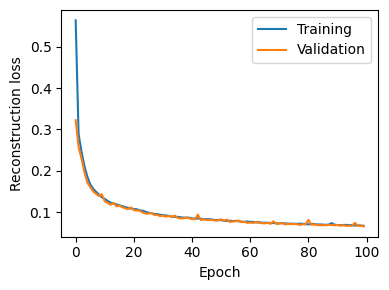

In [130]:
fig, axs = plt.subplots(1, 1, figsize=(4,3))
metric = 'loss'
_ = axs.plot(history_n_ae.epoch, history_n_ae.history[f'{metric}'], label='Training')
_ = axs.plot(history_n_ae.epoch, history_n_ae.history[f'val_{metric}'], label='Validation')                 
_ = axs.legend()
_ = axs.set_xlabel('Epoch')
_ = axs.set_ylabel('Reconstruction loss')
fig.tight_layout()

In [133]:
joblib.dump(autoencoder, 'autoencoder_n.pkl')

['autoencoder_n.pkl']

In [135]:
def get_reconst_loss(X):
    X_reconst = autoencoder.predict(X, batch_size=512)
    return (
        ((X-X_reconst)**2).sum(axis=1)
    )

In [137]:
import seaborn as sns

In [139]:
reconst_train.shape

(255883,)

In [140]:
train_df.shape

(255883, 30)

In [143]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc
from sklearn.manifold import TSNE

In [141]:
reconst_test = get_reconst_loss(X_test)

112/112 [==============================] - 0s 3ms/step


In [154]:
X_test.shape

(56962, 30)

In [155]:
reconst_test.shape

(56962,)

In [225]:
fb_ae = tf.keras.metrics.FBetaScore(beta = 2.0)
fb_ae.update_state(y_true = y_test.values.reshape(-1,1), y_pred = reconst_test.values.reshape(-1,1))
print(f'F1-Beta for Autoencoder: {fb_ae.result().numpy()}')

F1-Beta for Autoencoder: [0.00854343]


In [341]:
result_dict['Auto-Encoder Mean Squared Error'] = [0.990, 0.008]

In [219]:
reconst_test

255082     0.444216
213380     0.428046
164703    11.666449
88333      2.499099
107388     1.233803
            ...    
9010       0.165432
190982     0.537345
75187      0.192451
121376     1.060492
18869      0.211685
Length: 56962, dtype: float64

In [161]:
r_ae = tf.keras.metrics.Recall()
r_ae.update_state(y_true = y_test, y_pred = reconst_test)
print(f'Recall for Autoencoder - Binary Cross Entorpy: {r_ae.result().numpy()}')

Recall for Autoencoder Binary Cross Entorpy: 0.9897959232330322


In [167]:
def get_reconst_loss_fl(X):
    X_reconst = autoencoder_fl.predict(X, batch_size=512)
    return (
        ((X-X_reconst)**2).sum(axis=1)
    )

In [207]:
reconst_test_fl = get_reconst_loss_fl(X_test)

112/112 [==============================] - 0s 3ms/step


In [208]:
r_ae_fl = tf.keras.metrics.Recall()
r_ae_fl.update_state(y_true = y_test, y_pred = reconst_test_fl)
print(f'Recall for Autoencoder - Focal Loss: {r_ae_fl.result().numpy()}')

Recall for Autoencoder - Focal Loss: 1.0


In [272]:
fb_ae_fl = tf.keras.metrics.FBetaScore(beta = 2.0)
fb_ae_fl.update_state(y_true = y_test.values.reshape(-1,1), y_pred = reconst_test_fl.values.reshape(-1,1))
print(f'F1-Beta for Autoencoder - Focal Loss: {fb_ae_fl.result().numpy()}')

F1-Beta for Autoencoder - Focal Loss: [0.00854343]


In [342]:
result_dict['Auto-Encoder Focal Loss'] = [1.0, 0.008]

In [344]:
result_dict['Logistic Regression Unbalanced'] = [0.561, 0.604]

In [345]:
result_dict['Logistic Regression SMOTE (Balaned)'] = [0.867, 0.321]

In [346]:
result_dict['Isolation Forest Unbalanced'] = [0.898, 0.072]

In [347]:
result_dict['Isolation Forest SMOTE'] = [0.378, 0.142]

In [348]:
result_dict['Local Outlier Factor'] = [0.265, 0.021]

In [354]:
result_dict

{'IQR Method': [0.418, 0.381],
 'Modified Z Score': [0.388, 0.377],
 'DBSCAN': [0.888, 0.062],
 'DNN SMOTE Binary Cross Entropy': [0.796, 0.788],
 'DNN Unbalanced Binary Cross Entropy': [0.786, 0.785],
 'DNN Unbalanced Focal Loss': [0.776, 0.788],
 'DNN SMOTE Focal Loss': [0.847, 0.788],
 'Auto-Encoder Mean Squared Error': [0.99, 0.008],
 'Auto-Encoder Focal Loss': [1.0, 0.008],
 'Logistic Regression Unbalanced': [0.561, 0.604],
 'Logistic Regression SMOTE (Balaned)': [0.867, 0.321],
 'Isolation Forest Unbalanced': [0.898, 0.072],
 'Isolation Forest SMOTE': [0.378, 0.142],
 'Local Outlier Factor': [0.265, 0.021],
 'Guassian Mixture Model Unbalanced': [0.898, 0.02],
 'Guassian Mixture Model SMOTE Balanced': [0.01, 0.013]}

In [353]:
result_dict['Guassian Mixture Model SMOTE Balanced'] = [0.010, 0.013]

In [352]:
result_dict['Guassian Mixture Model Unbalanced'] = [0.898, 0.020]

In [351]:
del result_dict['Guassian Mixture Model - Balanced']

In [361]:
result_df = pd.DataFrame.from_dict(result_dict, orient = 'index', columns = ['Recall', 'F Beta Score'])

In [368]:
result_df.shape

(16, 2)

In [366]:
result_df.sort_values(by = 'Recall', ascending = False)

,Recall,F Beta Score
Auto-Encoder Focal Loss,1.000,0.008
Auto-Encoder Mean Squared Error,0.990,0.008
Isolation Forest Unbalanced,0.898,0.072
Guassian Mixture Model Unbalanced,0.898,0.020
DBSCAN,0.888,0.062
Logistic Regression SMOTE (Balaned),0.867,0.321
DNN SMOTE Focal Loss,0.847,0.788
DNN SMOTE Binary Cross Entropy,0.796,0.788
DNN Unbalanced Binary Cross Entropy,0.786,0.785
DNN Unbalanced Focal Loss,0.776,0.788


In [367]:
result_df

,Recall,F Beta Score
IQR Method,0.418,0.381
Modified Z Score,0.388,0.377
DBSCAN,0.888,0.062
DNN SMOTE Binary Cross Entropy,0.796,0.788
DNN Unbalanced Binary Cross Entropy,0.786,0.785
DNN Unbalanced Focal Loss,0.776,0.788
DNN SMOTE Focal Loss,0.847,0.788
Auto-Encoder Mean Squared Error,0.990,0.008
Auto-Encoder Focal Loss,1.000,0.008
Logistic Regression Unbalanced,0.561,0.604


In [216]:
reconst_test_fl

255082     49.566254
213380     96.144835
164703     44.284688
88333      55.387572
107388     33.336533
             ...    
9010       50.599418
190982     38.762143
75187      70.392527
121376     97.371148
18869     137.065623
Length: 56962, dtype: float64

In [227]:
print(f'Area under PR curve for test set: {pr_auc_score(y_test, np.log1p(reconst_test)):.3f}')

Area under PR curve for test set: 0.401


In [228]:
print(f'Area under PR curve for test set: {pr_auc_score(y_test, np.log1p(reconst_test_fl)):.3f}')

Area under PR curve for test set: 0.075


In [158]:
?r_ae.update_state

Signature: r_ae.update_state(self, y_true, y_pred, sample_weight=None)
Docstring:
Accumulates true positive and false negative statistics.

Args:
  y_true: The ground truth values, with the same dimensions as `y_pred`.
    Will be cast to `bool`.
  y_pred: The predicted values. Each element must be in the range
    `[0, 1]`.
  sample_weight: Optional weighting of each example. Can
    be a `Tensor` whose rank is either 0, or the same rank as `y_true`,
    and must be broadcastable to `y_true`. Defaults to `1`.

Returns:
  Update op.
File:      ~/miniconda3/lib/python3.11/site-packages/keras/src/metrics/confusion_metrics.py
Type:      function

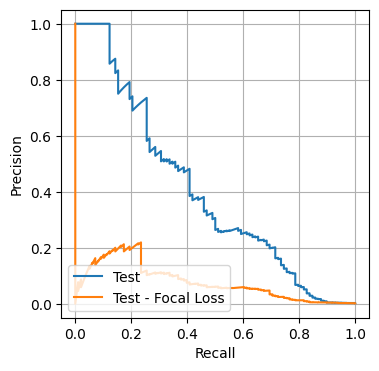

In [230]:
def plot_pr_curve(name, labels, predictions, ax, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)

    _ = ax.plot(recall, precision, label=name, **kwargs)
    _ = ax.set_ylabel('Precision')
    _ = ax.set_xlabel('Recall')
    _ = ax.grid(True)
    _ = ax.set_aspect('equal')
    
fig, ax = plt.subplots(1, 1, figsize=(4, 4))


plot_pr_curve("Test", y_test, np.log1p(reconst_test), ax)
plot_pr_curve("Test - Focal Loss", y_test, np.log1p(reconst_test_fl), ax)
_ = ax.legend(loc='lower left')

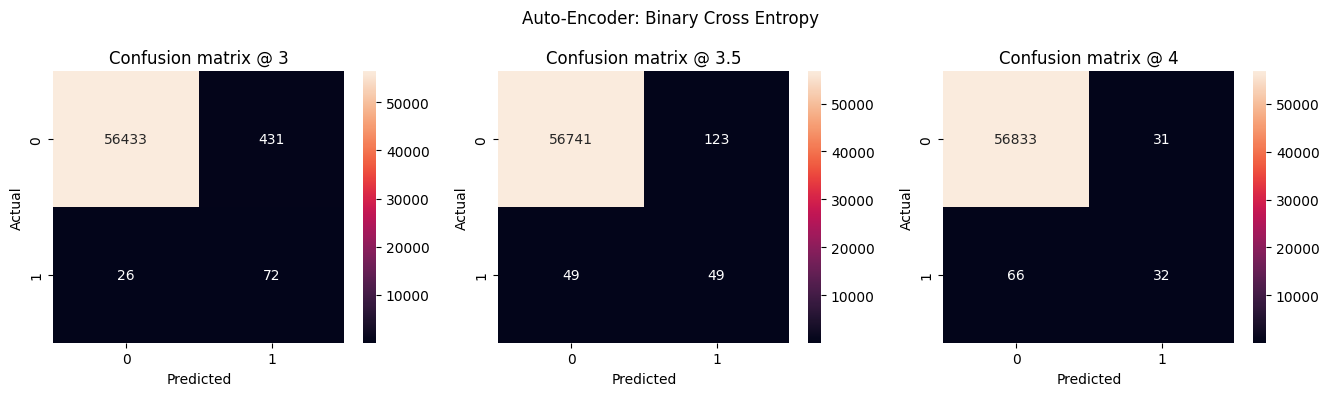

In [234]:
thresholds = [3, 3.5, 4]

fig, axs = plt.subplots(1, len(thresholds), figsize=(4.5*len(thresholds), 4))
for i, threshold in enumerate(thresholds):
    _ = sns.heatmap(confusion_matrix(y_test, np.log1p(reconst_test) > threshold), annot=True, ax=axs[i], fmt='g')
    _ = axs[i].set_ylabel('Actual')
    _ = axs[i].set_xlabel('Predicted')
    _ = axs[i].set_title(f'Confusion matrix @ {threshold}')
fig.suptitle('Auto-Encoder: Binary Cross Entropy')
fig.tight_layout()

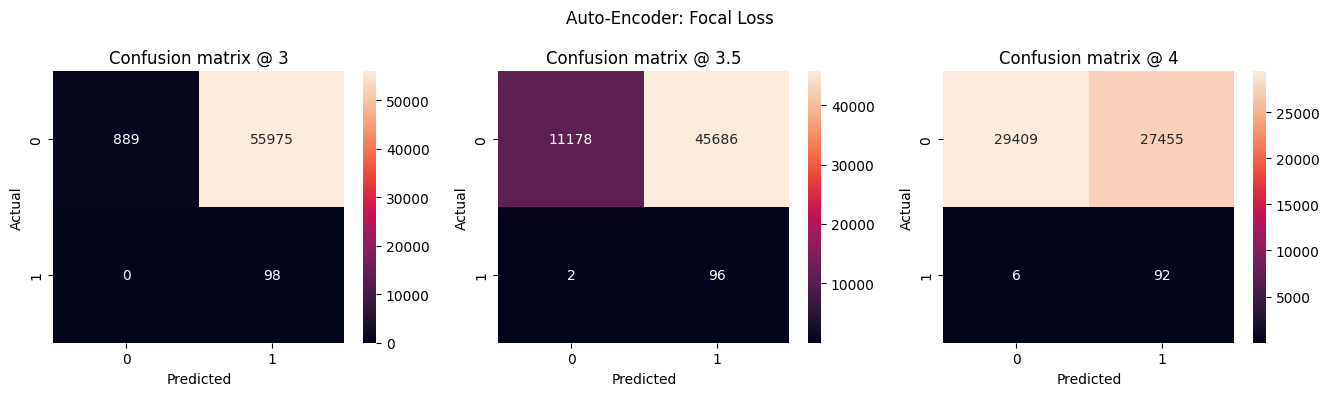

In [235]:
thresholds = [3, 3.5, 4]

fig, axs = plt.subplots(1, len(thresholds), figsize=(4.5*len(thresholds), 4))
for i, threshold in enumerate(thresholds):
    _ = sns.heatmap(confusion_matrix(y_test, np.log1p(reconst_test_fl) > threshold), annot=True, ax=axs[i], fmt='g')
    _ = axs[i].set_ylabel('Actual')
    _ = axs[i].set_xlabel('Predicted')
    _ = axs[i].set_title(f'Confusion matrix @ {threshold}')
fig.suptitle('Auto-Encoder: Focal Loss')
fig.tight_layout()

In [371]:
from sklearn.neighbors import LocalOutlierFactor

In [372]:
clf_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf_lof.fit_predict(X_test)

In [373]:
lof_outliers = X_test[y_pred==-1]
lof_pred = y_test[y_pred==-1]

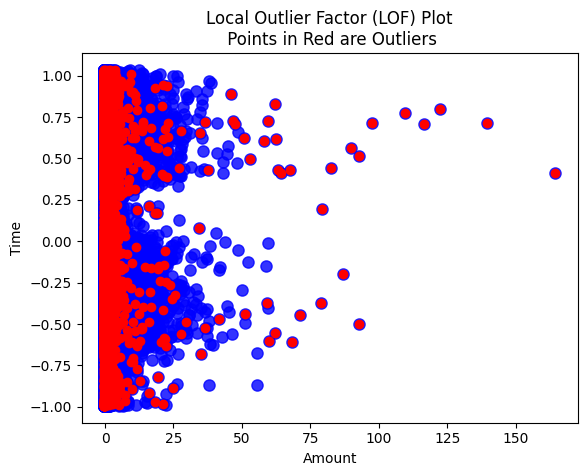

In [377]:
plt.scatter(x = X_test["Amount"],y = X_test["Time"], color = "b", s = 65, alpha = 0.8)
plt.scatter(lof_outliers["Amount"], lof_outliers["Time"], color = "r")
plt.title('Local Outlier Factor (LOF) Plot\n Points in Red are Outliers')
plt.xlabel('Amount')
plt.ylabel('Time')
plt.show()